#### Implementing Simple Chatbot using LangGraph

In [3]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END

## Reducers
from typing import Annotated
from langgraph.graph.message import add_messages

In [5]:
#state schema

class State(TypedDict):
    messages : Annotated[list,add_messages]

In [6]:
# load environment variables from .env file

import os
from dotenv import load_dotenv

load_dotenv()
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

In [11]:
from langchain_groq import ChatGroq

llm = ChatGroq(model="llama-3.1-8b-instant")
llm.invoke("Hello")

AIMessage(content='Hello. What can I help you with?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 36, 'total_tokens': 46, 'completion_time': 0.018384623, 'completion_tokens_details': None, 'prompt_time': 0.001622588, 'prompt_tokens_details': None, 'queue_time': 0.055809242, 'total_time': 0.020007211}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_1151d4f23c', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b63a0-1343-7171-b9e6-e9857fb77a26-0', usage_metadata={'input_tokens': 36, 'output_tokens': 10, 'total_tokens': 46})

In [12]:
#### create nodes

def superbot(state:State):
    return {"messages":[llm.invoke(state["messages"])]}

In [14]:
## create graph
graph = StateGraph(State)

graph.add_node("superBot",superbot)

graph.add_edge(START,"superBot")
graph.add_edge("superBot",END)

graph_builder = graph.compile()

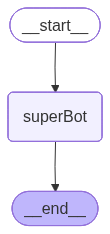

In [15]:
## visualize the graph
from IPython.display import Image,display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [16]:
## Execute the graph

graph_builder.invoke({"messages":"Hi, My name is Suresh and I like cricket. "})

{'messages': [HumanMessage(content='Hi, My name is Suresh and I like cricket. ', additional_kwargs={}, response_metadata={}, id='524efc77-aea8-4771-a8c2-f8b8f905a770'),
  AIMessage(content="Nice to meet you, Suresh.  I'm happy to hear that you like cricket. Cricket is a popular sport around the world, especially in India, Australia, England, and the West Indies. Which team or player is your favorite?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 51, 'prompt_tokens': 49, 'total_tokens': 100, 'completion_time': 0.079692908, 'completion_tokens_details': None, 'prompt_time': 0.002378563, 'prompt_tokens_details': None, 'queue_time': 0.055489886, 'total_time': 0.082071471}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_4387d3edbb', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b63a6-12f8-7c81-9ca7-fe6e99ca8610-0', usage_metadata={'input_tokens': 49, 'output_tokens': 51, 'to

In [17]:
graph_builder.invoke({"messages":"I Like India and Msdhoni"})

{'messages': [HumanMessage(content='I Like India and Msdhoni', additional_kwargs={}, response_metadata={}, id='5f77acc9-34bf-4de7-933a-69a956da3407'),
  AIMessage(content="It's great to hear that you like India and MS Dhoni. \n\nMahendra Singh Dhoni, popularly known as MS Dhoni, is a former Indian cricketer who is widely regarded as one of the greatest wicket-keepers and finishers in the history of the game. He was the captain of the Indian national team from 2007 to 2017 and led the team to several victories, including the 2011 ICC Cricket World Cup.\n\nDhoni is known for his calm and composed demeanor under pressure, which earned him the nickname 'Finisher.' He is also famous for his innovative and aggressive captaincy style, which often led to unexpected wins for the Indian team.\n\nDhoni's popularity extends beyond the cricket field, and he is considered a cultural icon in India. He has been honored with the Padma Shri, India's fourth-highest civilian award, in 2007.\n\nWhat is it 

In [20]:
print(State["messages"])

__main__.State['messages']


#### Streaming the response

In [ ]:
for event in graph_builder.stream({"messages":"Hello, how are you?"},stream_mode="values"):  #stream_mode = values / updates
    print(event)

{'messages': [HumanMessage(content='Hello, how are you?', additional_kwargs={}, response_metadata={}, id='a5965e36-aac0-4472-95dc-a26bbd683b5c')]}
{'messages': [HumanMessage(content='Hello, how are you?', additional_kwargs={}, response_metadata={}, id='a5965e36-aac0-4472-95dc-a26bbd683b5c'), AIMessage(content="I'm functioning properly, thank you for asking. I'm a large language model, so I don't have feelings in the same way humans do, but I'm here to help with any questions or information you need. How can I assist you today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 52, 'prompt_tokens': 41, 'total_tokens': 93, 'completion_time': 0.068805746, 'completion_tokens_details': None, 'prompt_time': 0.001950696, 'prompt_tokens_details': None, 'queue_time': 0.055651364, 'total_time': 0.070756442}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_ff2b098aaf', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provi